<a href="https://colab.research.google.com/github/Mhmd-sh3rawy/NTI_ML_notebooks/blob/main/Week_3/first_day/KNN/SPAM_KNN_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task


In [14]:
import pandas as pd

df = pd.read_csv('SPAM text message 20170820 - Data.csv')
display(df.head())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
display(df.head())
display(df.isnull().sum())
display(df['Category'].value_counts())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,0
Category,0
Message,0


,count
Category,
ham,4825
spam,747


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

vectorizer = CountVectorizer()
message_matrix = vectorizer.fit_transform(df['Message'])

display(df.head())
display(message_matrix)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 74098 stored elements and shape (5572, 8709)>

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(message_matrix, df['Category'], test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4457, 8709)
Shape of X_test: (1115, 8709)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn_model.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       0.99      0.68      0.80       149

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Confusion Matrix:
[[965   1]
 [ 48 101]]


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(3, 21)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 3}
Best cross-validation score:  0.9241626529369429


              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1036
           1       0.53      1.00      0.69        79

    accuracy                           0.94      1115
   macro avg       0.77      0.97      0.83      1115
weighted avg       0.97      0.94      0.95      1115



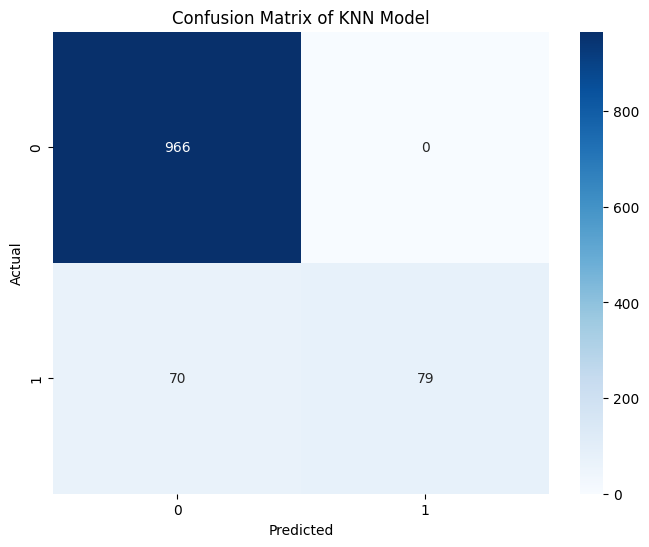

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
print(classification_report(y_pred_best, y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Model')
plt.show()

In [22]:
# The dataset is imbalanced as seen from the value counts of the 'Category' column.
# We will use oversampling to handle this imbalance.
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")

Shape of X_train_resampled: (7718, 8709)
Shape of y_train_resampled: (7718,)
